In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1718/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1718/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1718/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1718/N1.csv'
                          }

urls1617 = {'EN': 'http://www.football-data.co.uk/mmz4281/1617/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1617/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1617/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1617/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1617/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1617/N1.csv'
                          }


In [3]:
all_data1617=get_data(urls1617)
all_data=get_data(urls)
#all_data['EN']=add_match(all_data['EN'],'Liverpool',2,'Newcastle',0)
#all_data['EN']=add_match(all_data['EN'],'Tottenham',2,'Huddersfield',0)
#all_data['EN']=add_match(all_data['EN'],'Brighton',2,'Arsenal',1)
#all_data['EN']=add_match(all_data['EN'],'Man City',1,'Chelsea',0)
#all_data['EN']=add_match(all_data['EN'],'Man United',2,'Liverpool',1)
all_data['EN'].tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
290,2018-10-03,Chelsea,Crystal Palace,2,1
291,2018-10-03,Everton,Brighton,2,0
292,2018-10-03,Huddersfield,Swansea,0,0
293,2018-10-03,Man United,Liverpool,2,1
294,2018-10-03,Newcastle,Southampton,3,0
295,2018-10-03,West Brom,Leicester,1,4
296,2018-10-03,West Ham,Burnley,0,3
297,2018-11-03,Arsenal,Watford,3,0
298,2018-11-03,Bournemouth,Tottenham,1,4
299,2018-12-03,Stoke,Man City,0,2


In [7]:
calibrator_1617=Calibrator('calibration_1617.pkl')
for _country in all_data1617:
    calibrator_1617.process_data(all_data1617[_country],_country)

calibration_1617.pkl  exists.
file exists, loading
2132


In [8]:
calibrator=Calibrator('calibration.pkl',old_teams=calibrator_1617.teams)
for _country in all_data:
    calibrator.process_data(all_data[_country],_country)
teams=calibrator.teams

calibration.pkl  exists.
file exists, loading
1619


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c83ae48>,
      dtype=object)

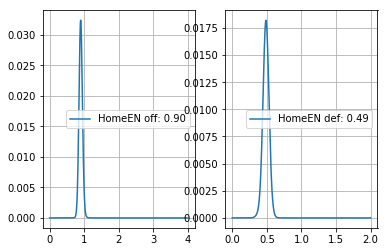

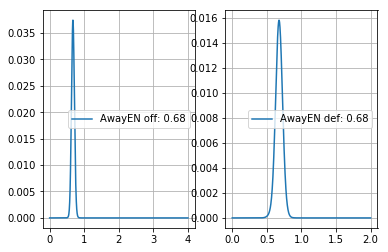

In [12]:
calibrator.teams['HomeEN'].plt()
calibrator.teams['AwayEN'].plt()

In [15]:
EnglishTeams={x:teams[x] for x in teams if teams[x].country=='EN'}
#EnglishTeams['Home']=calibrator.teams['HomeEN']
#EnglishTeams['Away']=calibrator.teams['AwayEN']
PremierLeague=Season(EnglishTeams)
PremierLeague.process_current_results(all_data['EN'])
PremierLeague.simulate_season(n_scenarios=100000)
PremierLeague.season_report()

simulation not yet processed, processing


,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Man City,99.6,88,111,3,1,76.94,99.31,2.24,0.14,0.00
Tottenham,88.3,76,100,6,1,10.35,84.47,1.53,0.08,0.00
Liverpool,85.7,73,98,6,1,6.47,74.69,1.64,0.26,0.00
Chelsea,83.4,70,96,6,2,3.48,62.89,1.37,0.12,0.00
Man United,81.8,69,94,6,2,2.32,54.26,1.27,0.09,0.00
Arsenal,75.4,62,89,8,3,0.44,23.03,1.36,0.39,0.00
Home,60.4,47,74,15,6,0.00,0.76,0.90,0.49,0.47
Leicester,57.9,45,71,16,6,0.00,0.34,0.90,0.57,1.02
Burnley,55.8,43,69,17,7,0.00,0.13,0.46,0.17,1.46
Everton,53.2,40,67,19,7,0.00,0.06,0.75,0.59,3.78


In [ ]:
ItalianTeams={x:teams[x] for x in teams if teams[x].country=='IT'}
SerieA=Season(ItalianTeams)
SerieA.process_current_results(all_data['IT'])
SerieA.simulate_season(n_scenarios=100000)
SerieA.season_report()

In [ ]:
DutchTeams={x:teams[x] for x in teams if teams[x].country=='NL'}
Eredivisie=Season(DutchTeams,nr_cl=2)
Eredivisie.process_current_results(all_data['NL'])
Eredivisie.simulate_season(n_scenarios=100000)
Eredivisie.season_report()

In [ ]:
SpanishTeams={x:teams[x] for x in teams if teams[x].country=='ES'}
LaLiga=Season(SpanishTeams)
LaLiga.process_current_results(all_data['ES'])
LaLiga.simulate_season(n_scenarios=100000)
LaLiga.season_report()

In [ ]:
GermanTeams={x:teams[x] for x in teams if teams[x].country=='DE'}
Bundesliga=Season(GermanTeams)
Bundesliga.process_current_results(all_data['DE'])
Bundesliga.simulate_season(n_scenarios=100000)
Bundesliga.season_report()

In [ ]:
PremierLeague.team_report('Man United')

# Most important matches

In [ ]:
imp=[]
ref_team='Man United'
matches=[]
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
PremierLeague.what_if(the_match,ref_team=ref_team)

In [ ]:
PremierLeague.what_if('Chelsea v Liverpool',ref_team=ref_team)

In [ ]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(40)
plt.bar(xx,imp[xx])
plt.xticks(xx,matches[xx],rotation=90);
plt.grid(True)

In [ ]:
teams['Man United']+calibrator_1617.teams['Man United']

In [ ]:
team_name='Man United'
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],5])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n